In [112]:
import matplotlib.pyplot as plt
import numpy as np
data_pos=np.array([[1,5],[2,6],[3,7],[4,8],[5,9],[7,2],[8,3]])
data_neg=np.array([[2,7],[3,8],[5,1],[6,2],[7,3],[8,4],[9,5]])
data=np.concatenate([data_pos,data_neg])
data_y=[1]*7+[-1]*7

In [108]:
def visualize(model,axis):
    colors=['pink','orange','paleturquoise','dodgerblue','green','grey','navy','purple','c','violet','peru']
    xs,ys=np.meshgrid(np.arange(-1,10,0.05),np.arange(-1,10,0.05))
    predictions=model.predict([[x,y] for x,y in zip(xs.reshape(-1),ys.reshape(-1))])
    axis.contourf(xs,ys,predictions.reshape(xs.shape),levels=len(np.unique(predictions)),colors=colors,alpha=0.2)
    axis.contour(xs,ys,predictions.reshape(xs.shape),levels=len(np.unique(predictions)),colors='k')

### *Question 8*

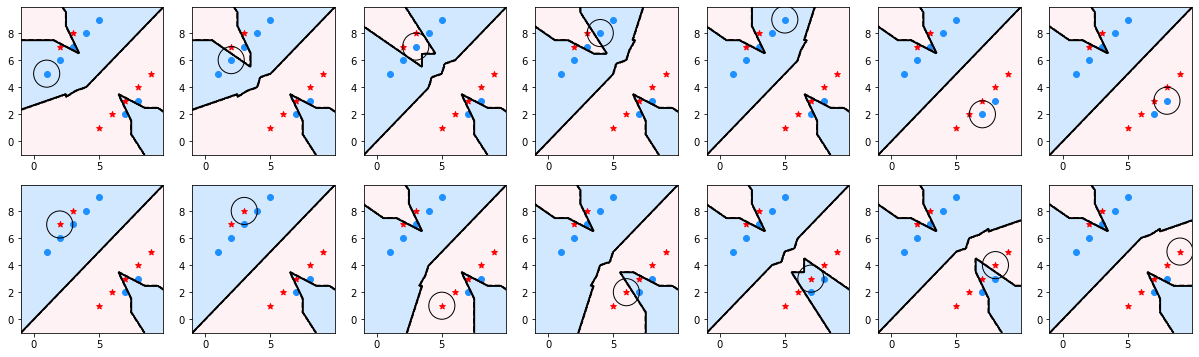

In [113]:
# Leave-one-out cross validation decision boundaries:
K=3
fig,axes=plt.subplots(ncols=7,nrows=2,figsize=(21,6))
from sklearn.neighbors import KNeighborsClassifier as knn
for i in range(len(data)):
    model=knn(n_neighbors=K,p=2)
    model.fit(np.concatenate([data[:i],data[i+1:]]),np.concatenate([data_y[:i],data_y[i+1:]]))
    visualize(model,axes[i//7,i%7])
    axes[i//7,i%7].scatter(data_pos[:,0],data_pos[:,1],color='dodgerblue')
    axes[i//7,i%7].scatter(data_neg[:,0],data_neg[:,1],color='red',marker='*')
    axes[i//7,i%7].add_artist(plt.Circle(data[i],1,color='k',fill=False))

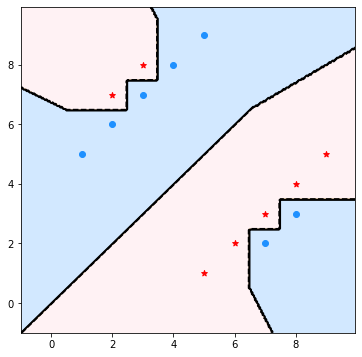

In [115]:
# 1-NN decision boundaries:
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(6,6))
model=knn(n_neighbors=1,p=2)
model.fit(np.concatenate([data[:i],data[i+1:]]),np.concatenate([data_y[:i],data_y[i+1:]]))
visualize(model,axes)
axes.scatter(data_pos[:,0],data_pos[:,1],color='dodgerblue')
axes.scatter(data_neg[:,0],data_neg[:,1],color='red',marker='*')

### *Question 7*

(-2.0, 2.0)

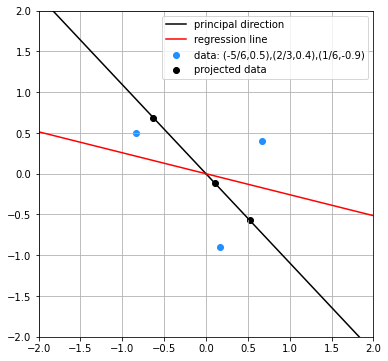

In [110]:
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(6,6))
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression as LR
data=np.array([[0,0.1],[1.5,0],[1,-1.3]])
data=np.subtract(data,np.mean(data,axis=0))
model=PCA(n_components=1)
lr=LR()
lr.fit([[d] for d in data[:,0]],[[d] for d in data[:,1]])
new_data=model.fit_transform(data)
projections=np.array([nd*model.components_[0] for nd in new_data])
axes.scatter(data[:,0],data[:,1],color='dodgerblue',label="data: (-5/6,0.5),(2/3,0.4),(1/6,-0.9)")
axes.plot([0,3*model.components_[0][0]],[0,3*model.components_[0][1]],color="k")
axes.plot([-3*model.components_[0][0],0],[-3*model.components_[0][1],0],color="k",label="principal direction")
axes.plot([-2,2],[-2*lr.coef_[0][0]+lr.intercept_,2*lr.coef_[0][0]+lr.intercept_],color="r",label="regression line")
axes.scatter(projections[:,0],projections[:,1],color='k',label="projected data")
axes.grid()
axes.legend()
axes.set_xlim((-2,2))
axes.set_ylim((-2,2))
#plt.savefig("hw2solutions2.png")